# **Random Forest Assignment**

# **Assignment 15(a)**

# ***1.Company_Data DataSet(Company_Data.csv)***

# **Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# **Importing DataSet**

In [2]:
#importing dataset
df=pd.read_csv('Company_Data.csv')
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [3]:
df.tail()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes

# **Exploratory Data Analysis**

In [4]:
df.shape

(400, 11)

In [5]:
#checking missing values
(df.isna().sum())/len(df)*100

Sales          0.0
CompPrice      0.0
Income         0.0
Advertising    0.0
Population     0.0
Price          0.0
ShelveLoc      0.0
Age            0.0
Education      0.0
Urban          0.0
US             0.0
dtype: float64

In [6]:
df.isna().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [7]:
#checking duplicates
df.duplicated().sum()

0

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

In [9]:
#checking datatypes
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [10]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


# **Features Engineering**

In [12]:
# A Random Forest is built with target variable Sales (we will first convert it in categorical variable)
# all other variable will be independent in the analysis.

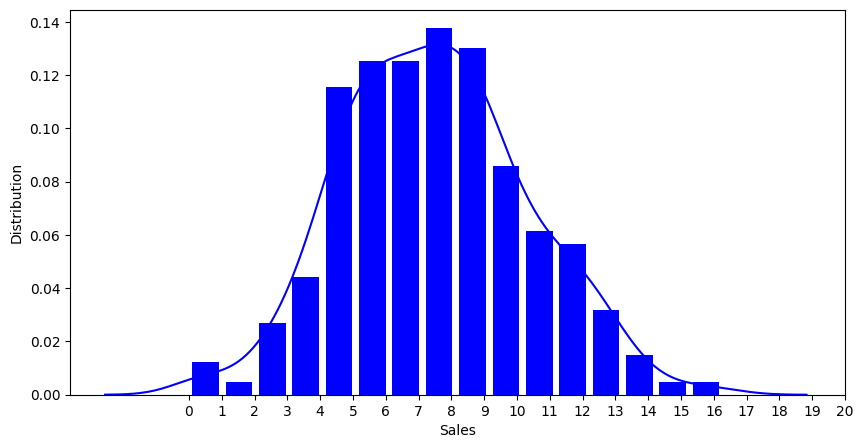

In [13]:
#distplot
plt.figure(figsize=(10,5))
sns.distplot(df['Sales'],color='blue',hist_kws={'rwidth':0.8,'alpha':1.0})
plt.xticks(np.arange(0,21,1))
plt.xlabel('Sales')
plt.ylabel('Distribution')
plt.show()

In [14]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [15]:
df1=df.copy()

In [16]:
df1['SalesCat']=pd.cut(x=df1['Sales'],bins=[0,5.39,9.32,17],labels=['Low','Medium','High'],right=False)
df1

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US SalesCat  
0           17   Yes  Yes     High  
1           10   Yes  Yes     High  
2           12   Yes  Yes     High  
3           14   Yes  Yes   Medium  
4           13   Yes   No      Low  
..         ...   ...  ...      ...  
395         14   Yes  Yes     High  
396         11    No  Yes   Medium  
397         18   Yes  Yes   Medium  
398         12   Yes  Yes   Medium  
399         16   Yes  Yes     High  

[400 rows x 12 columns]

In [17]:
df1['SalesCat'].value_counts()

Medium    198
High      102
Low       100
Name: SalesCat, dtype: int64

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  SalesCat     400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [19]:
df1.groupby(['ShelveLoc','Urban','US']).count()

Sales  CompPrice  Income  Advertising  Population  Price  \
ShelveLoc Urban US                                                              
Bad       No    No      11         11      11           11          11     11   
                Yes     11         11      11           11          11     11   
          Yes   No      23         23      23           23          23     23   
                Yes     51         51      51           51          51     51   
Good      No    No       6          6       6            6           6      6   
                Yes     22         22      22           22          22     22   
          Yes   No      18         18      18           18          18     18   
                Yes     39         39      39           39          39     39   
Medium    No    No      29         29      29           29          29     29   
                Yes     39         39      39           39          39     39   
          Yes   No      55         55      55           55          55     55   
                Yes     96         96      96           96          96     96   

                     Age  Education  SalesCat  
ShelveLoc Urban US                             
Bad       No    No    11         11        11  
                Yes   11         11        11  
          Yes   No    23         23        23  
                Yes   51         51        51  
Good      No    No     6          6         6  
                Yes   22         22        22  
          Yes   No    18         18        18  
                Yes   39         39        39  
Medium    No    No    29         29        29  
                Yes   39         39        39  
          Yes   No    55         55        55  
                Yes   96         96        96

In [20]:
df['ShelveLoc'].nunique()

3

In [21]:
df['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [22]:
df['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [23]:
categorical_feat=df1.describe(include=['object','category']).columns
categorical_feat

Index(['ShelveLoc', 'Urban', 'US', 'SalesCat'], dtype='object')

In [24]:
numerical_feat=df1.describe(include=['int64','float64']).columns
numerical_feat

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

# **Correlation**

In [25]:
#correlation
df1.corr()

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0.006488  
Education    0.006488   1.000000

# **Visualization**

# **HeatMap**

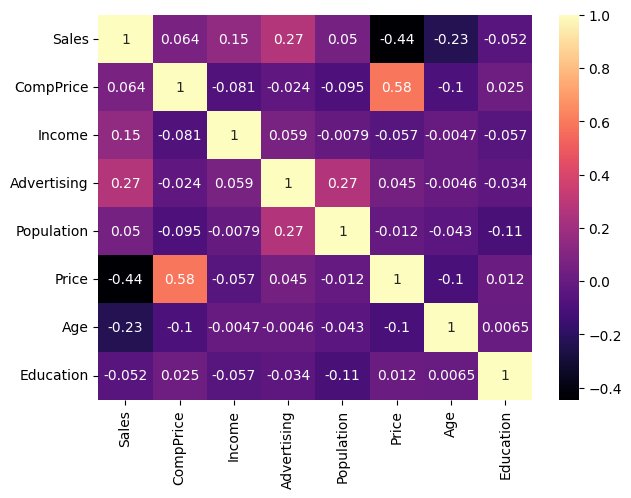

In [26]:
#heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df1.corr(),annot=True,cmap='magma')
plt.show()

# **PairPlot**

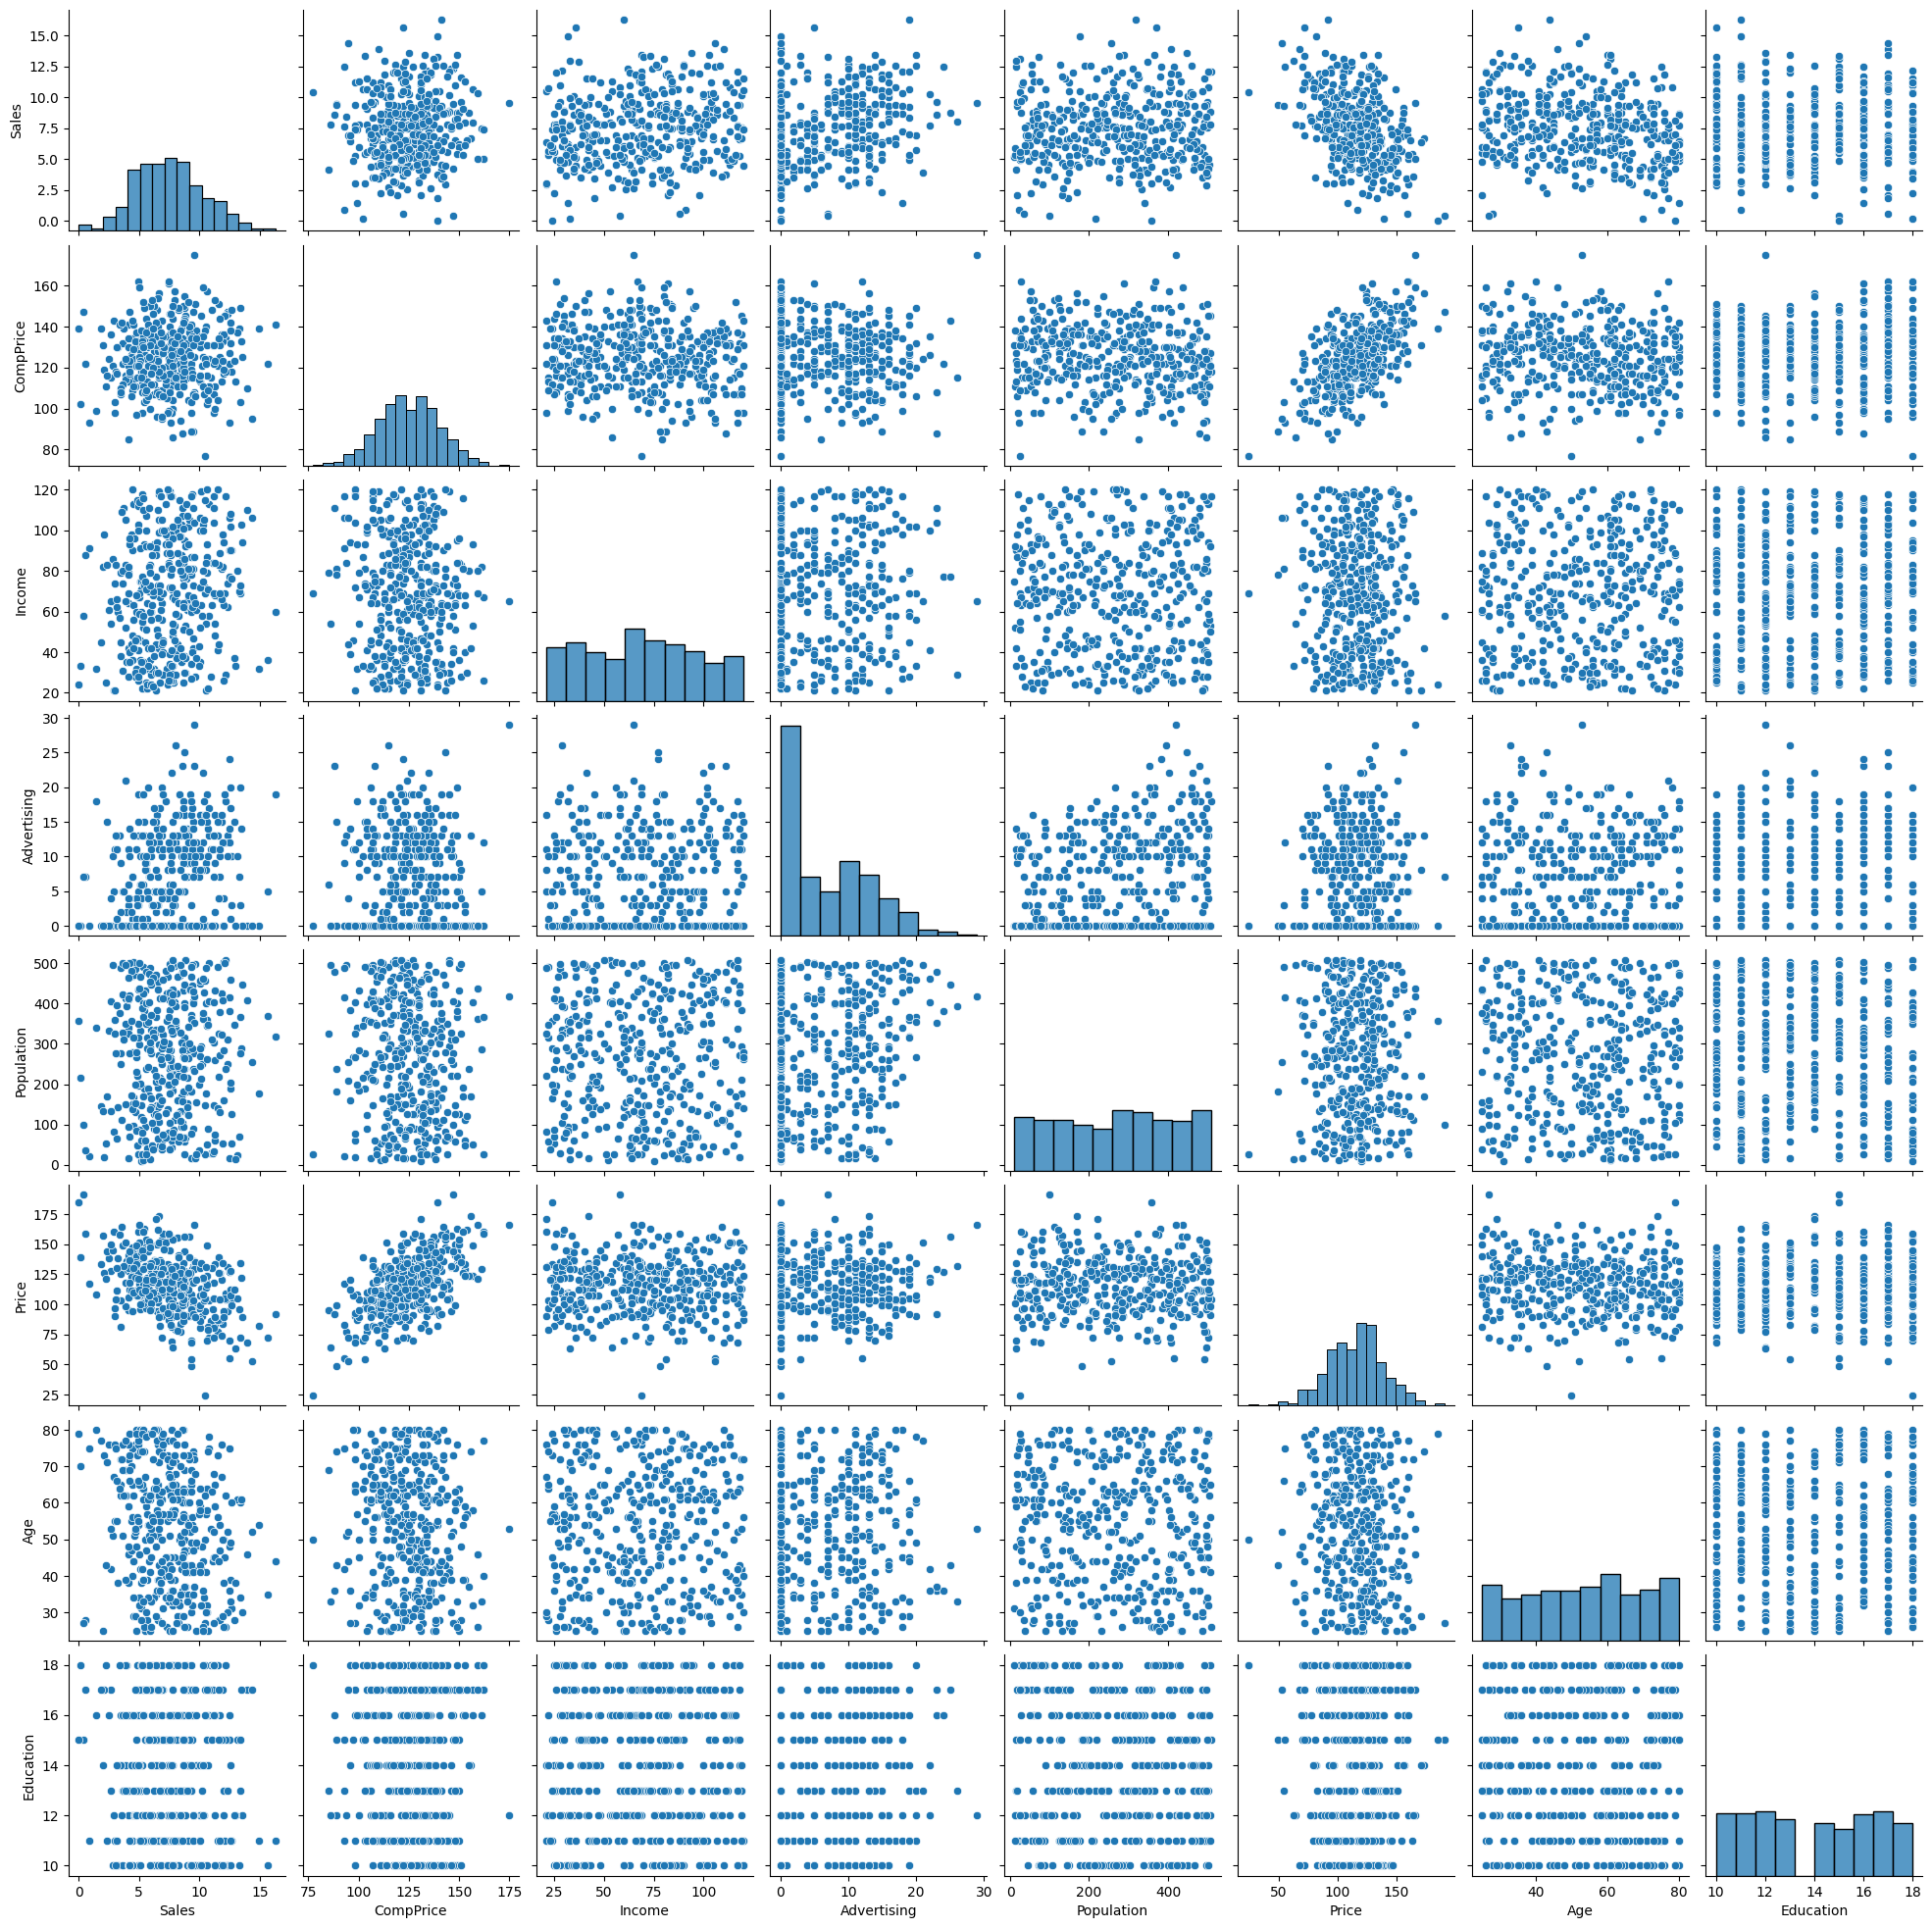

In [27]:
#pairplot
sns.pairplot(df1)

# **Regression Plot**

<Axes: xlabel='Sales', ylabel='Income'>

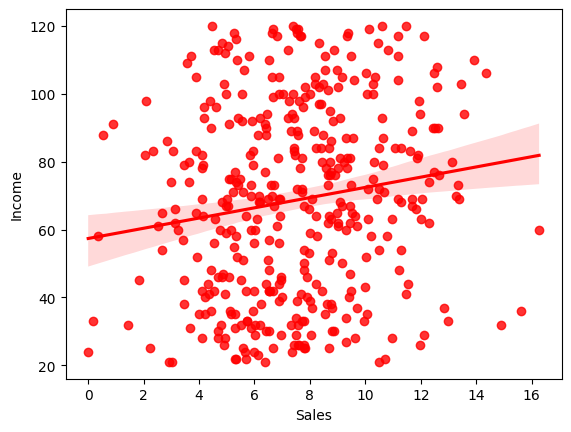

In [28]:
#regression plot
sns.regplot(x='Sales',y='Income',data=df1,color='red')

In [29]:
#now distplot for numeric base data

# **Univariate plot**

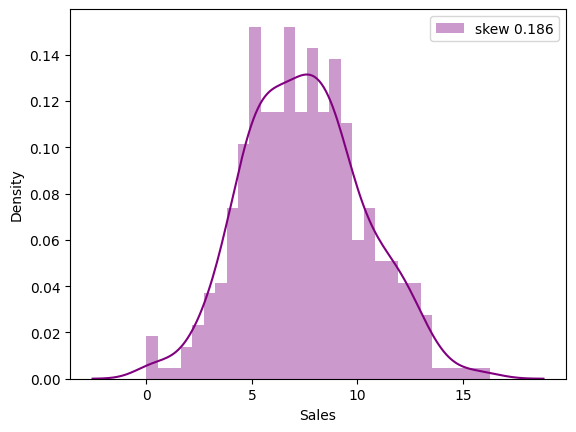

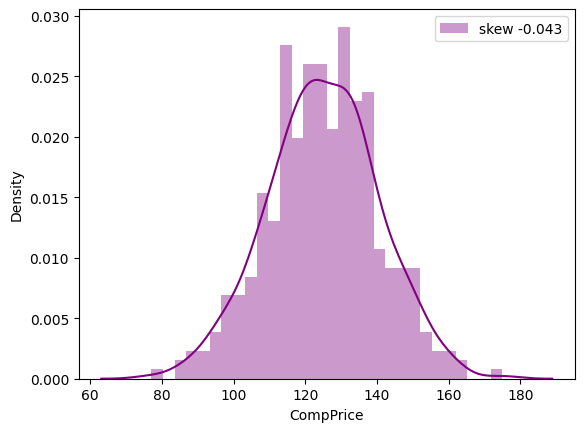

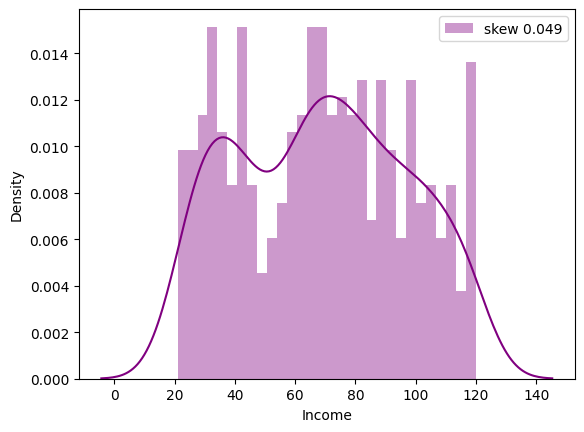

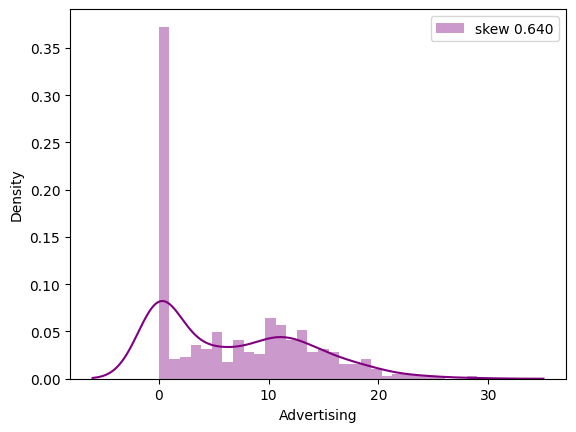

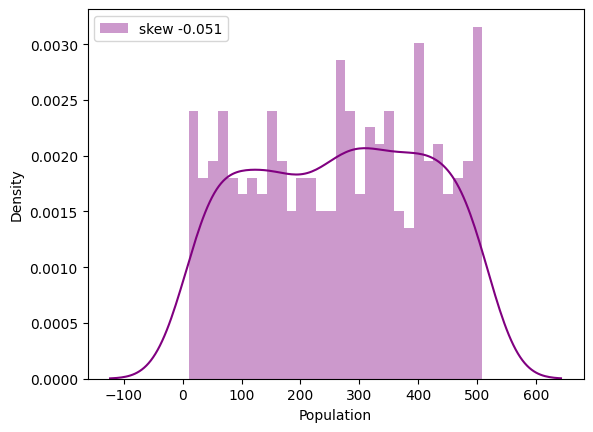

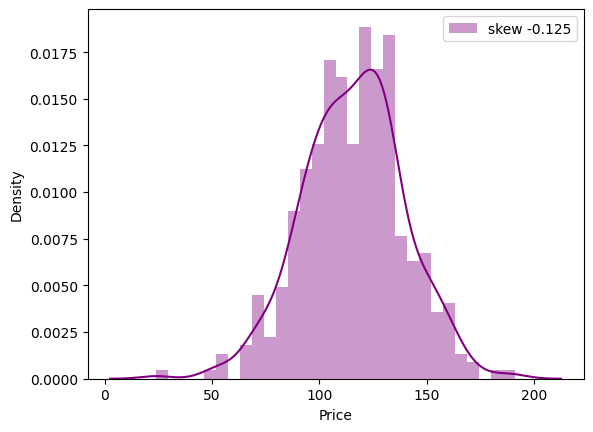

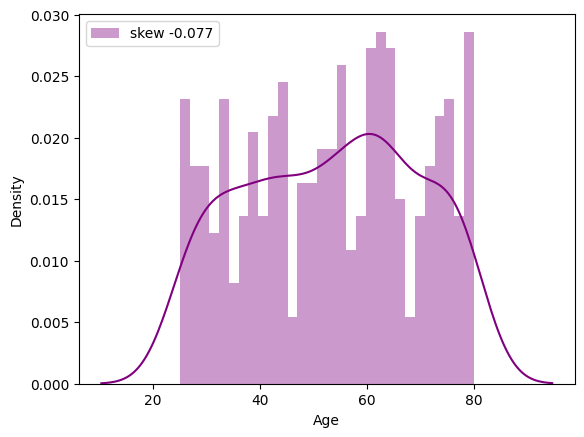

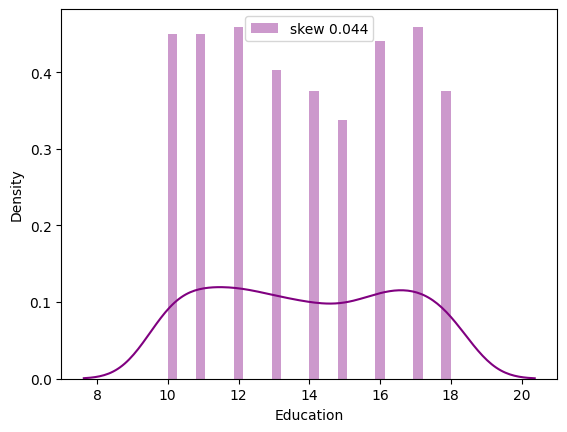

In [30]:
#distplot for numeric base data
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
for f in numerical_features:
  skew=df[f].skew()
  sns.distplot(df[f],label='skew %.3f'%skew,bins=30,color='purple')
  plt.legend()
  plt.show()

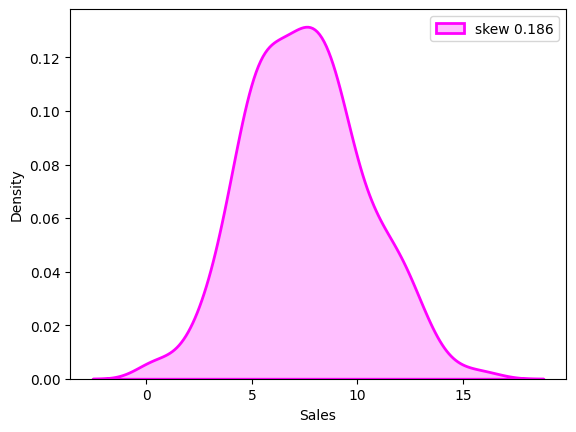

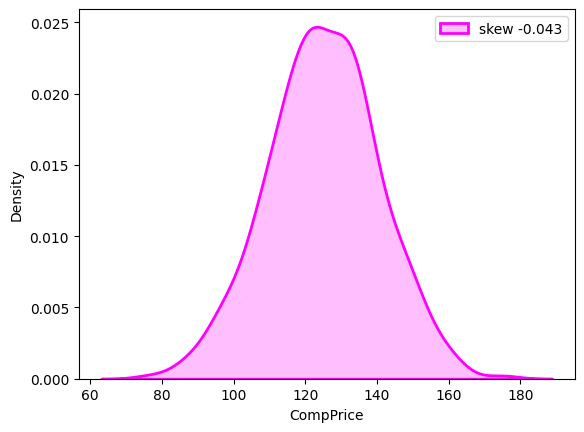

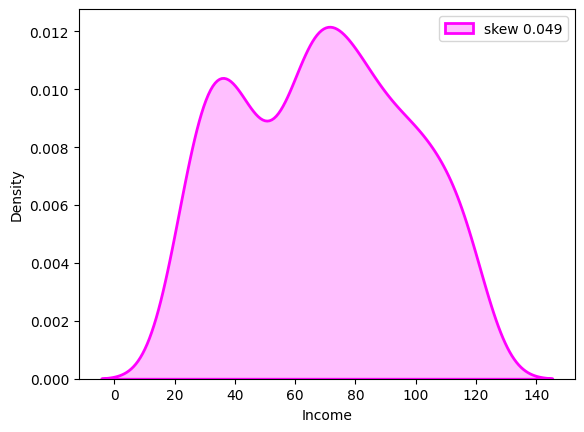

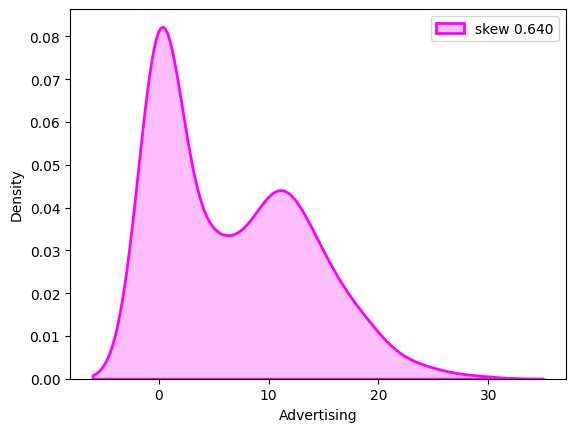

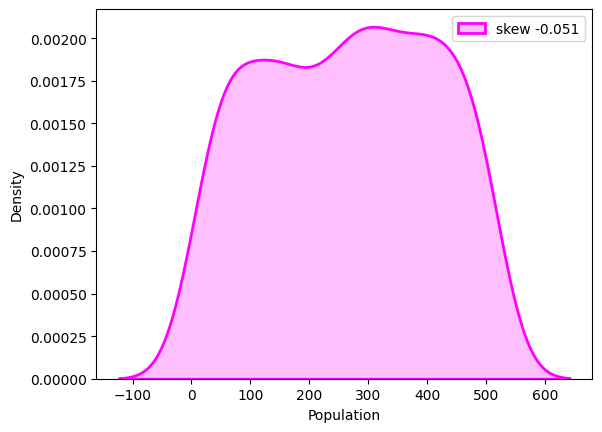

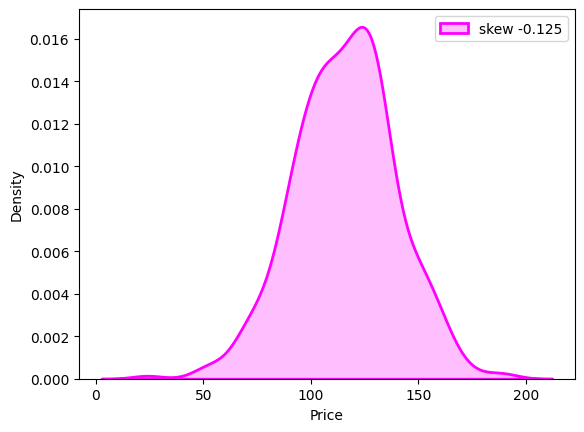

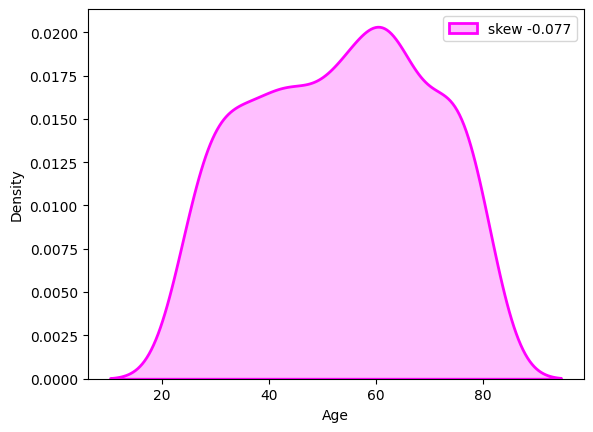

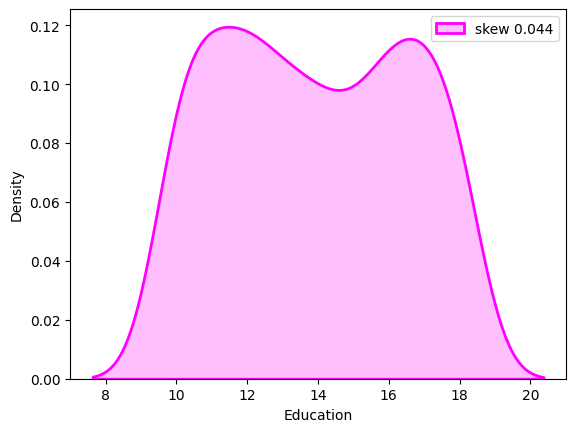

In [31]:
#kdeplot for numeric base data
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
for f in numerical_features:
  skew=df[f].skew()
  sns.kdeplot(df[f],label='skew %.3f'%skew,color='fuchsia',shade='True',linewidth=2)
  plt.legend()
  plt.show()

In [32]:
#features are not normally distributed

# **Histogram**

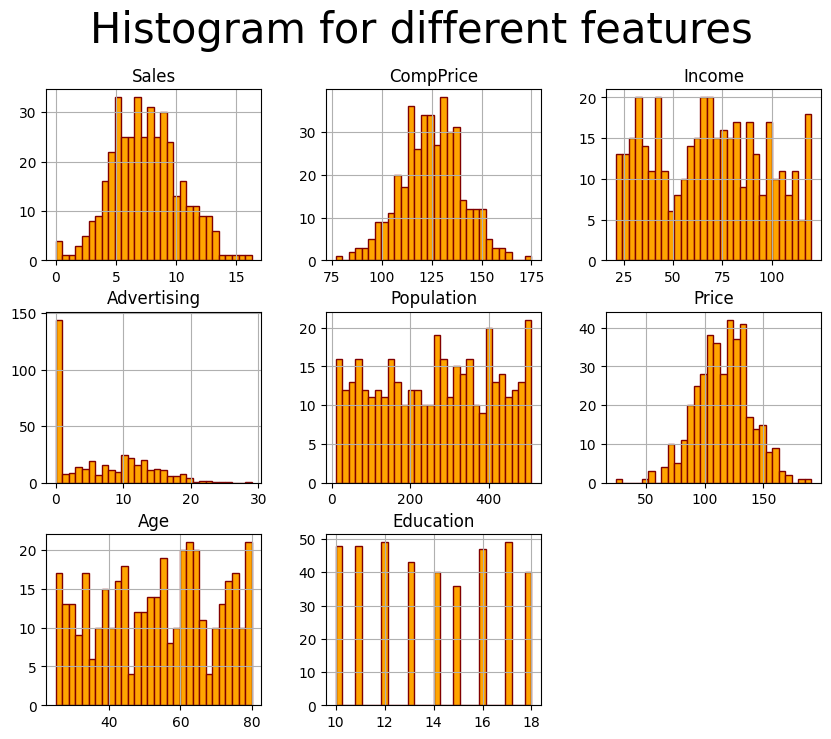

In [33]:
#Histogram for different feature
df.hist(bins=30,figsize=(10,8),rwidth=1,color='orange',edgecolor='maroon')
plt.suptitle('Histogram for different features',ha='center',fontsize=30)
plt.show()

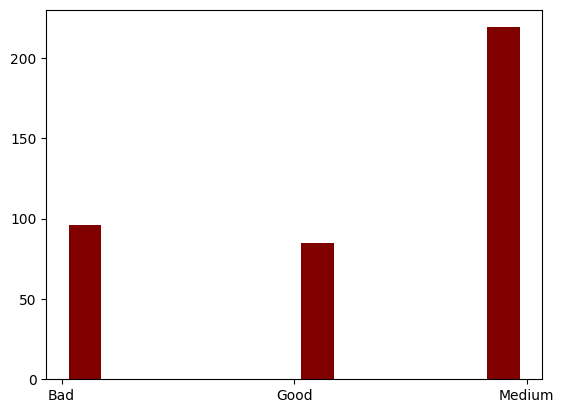

In [34]:
#histogram for ShelveLoc
plt.hist(df['ShelveLoc'],rwidth=0.7,color='maroon')
plt.show()

# **Boxplot**

In [35]:
numerical_feat

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

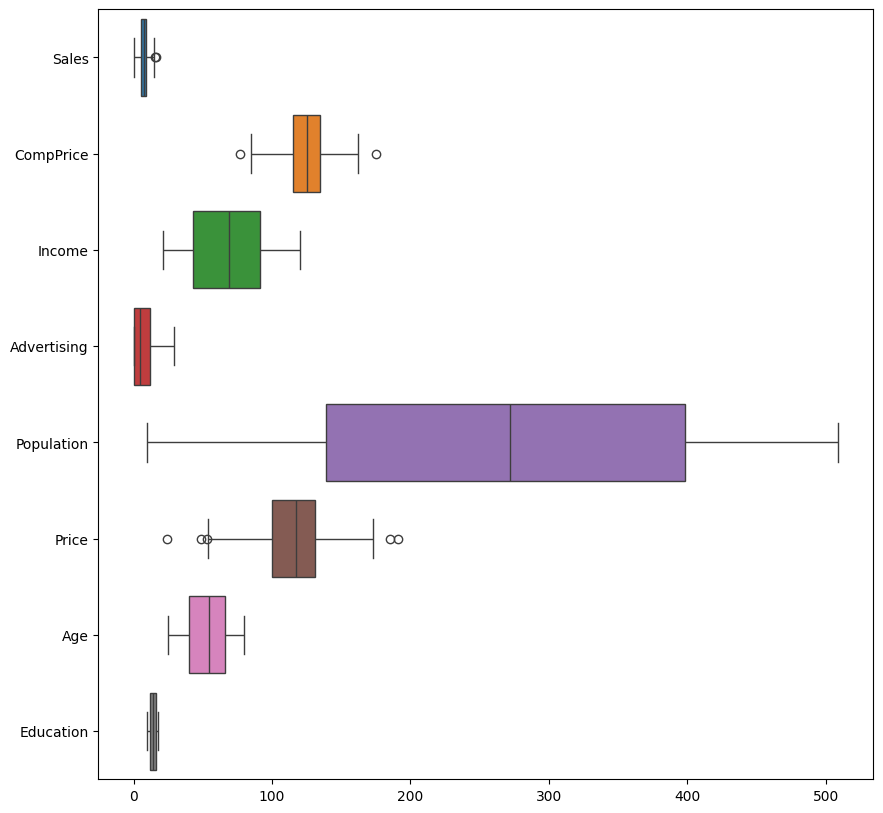

In [36]:
#boxplot
plt.figure(figsize=(10,10))
sns.boxplot(df,orient='h')
plt.show()

# **CountPlot**

In [37]:
#for categorical feature

<Axes: xlabel='ShelveLoc', ylabel='count'>

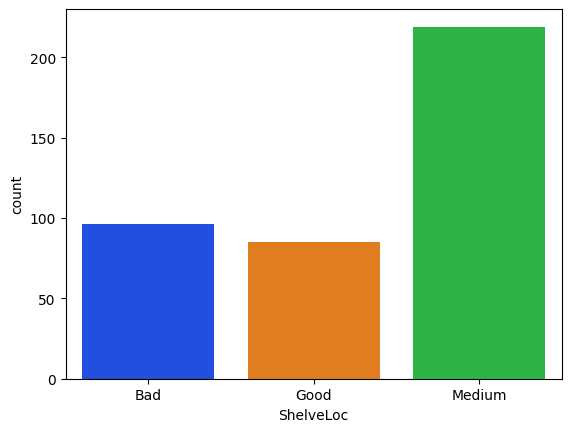

In [38]:
sns.countplot(x='ShelveLoc',data=df1,palette='bright')

<Axes: xlabel='Urban', ylabel='count'>

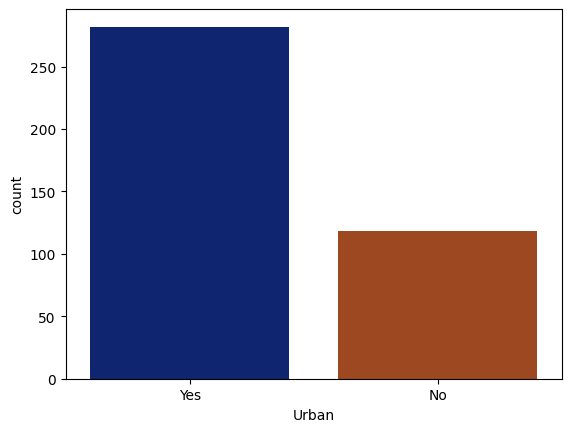

In [39]:
sns.countplot(x='Urban',data=df1,palette='dark')

<Axes: xlabel='US', ylabel='count'>

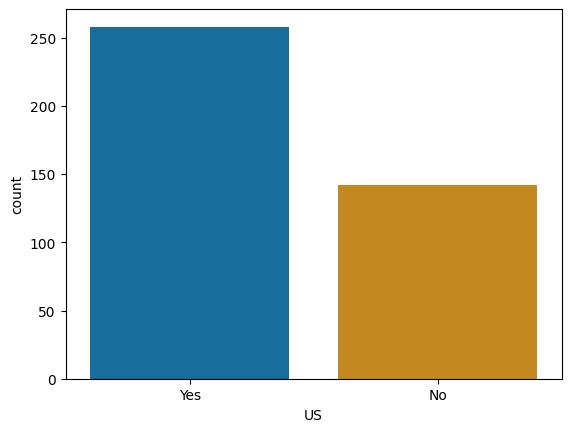

In [40]:
sns.countplot(x='US',data=df1,palette='colorblind')

<Axes: xlabel='SalesCat', ylabel='count'>

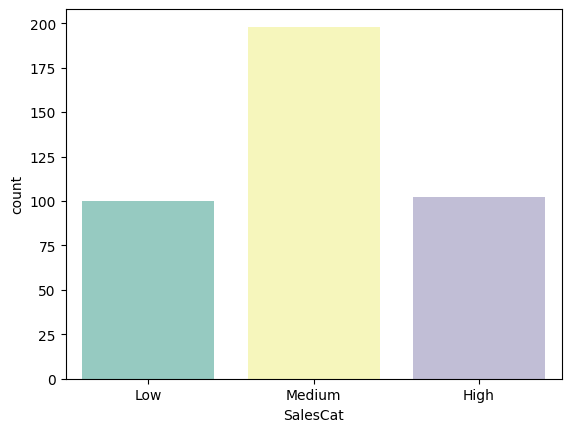

In [41]:
sns.countplot(x='SalesCat',data=df1,palette='Set3')

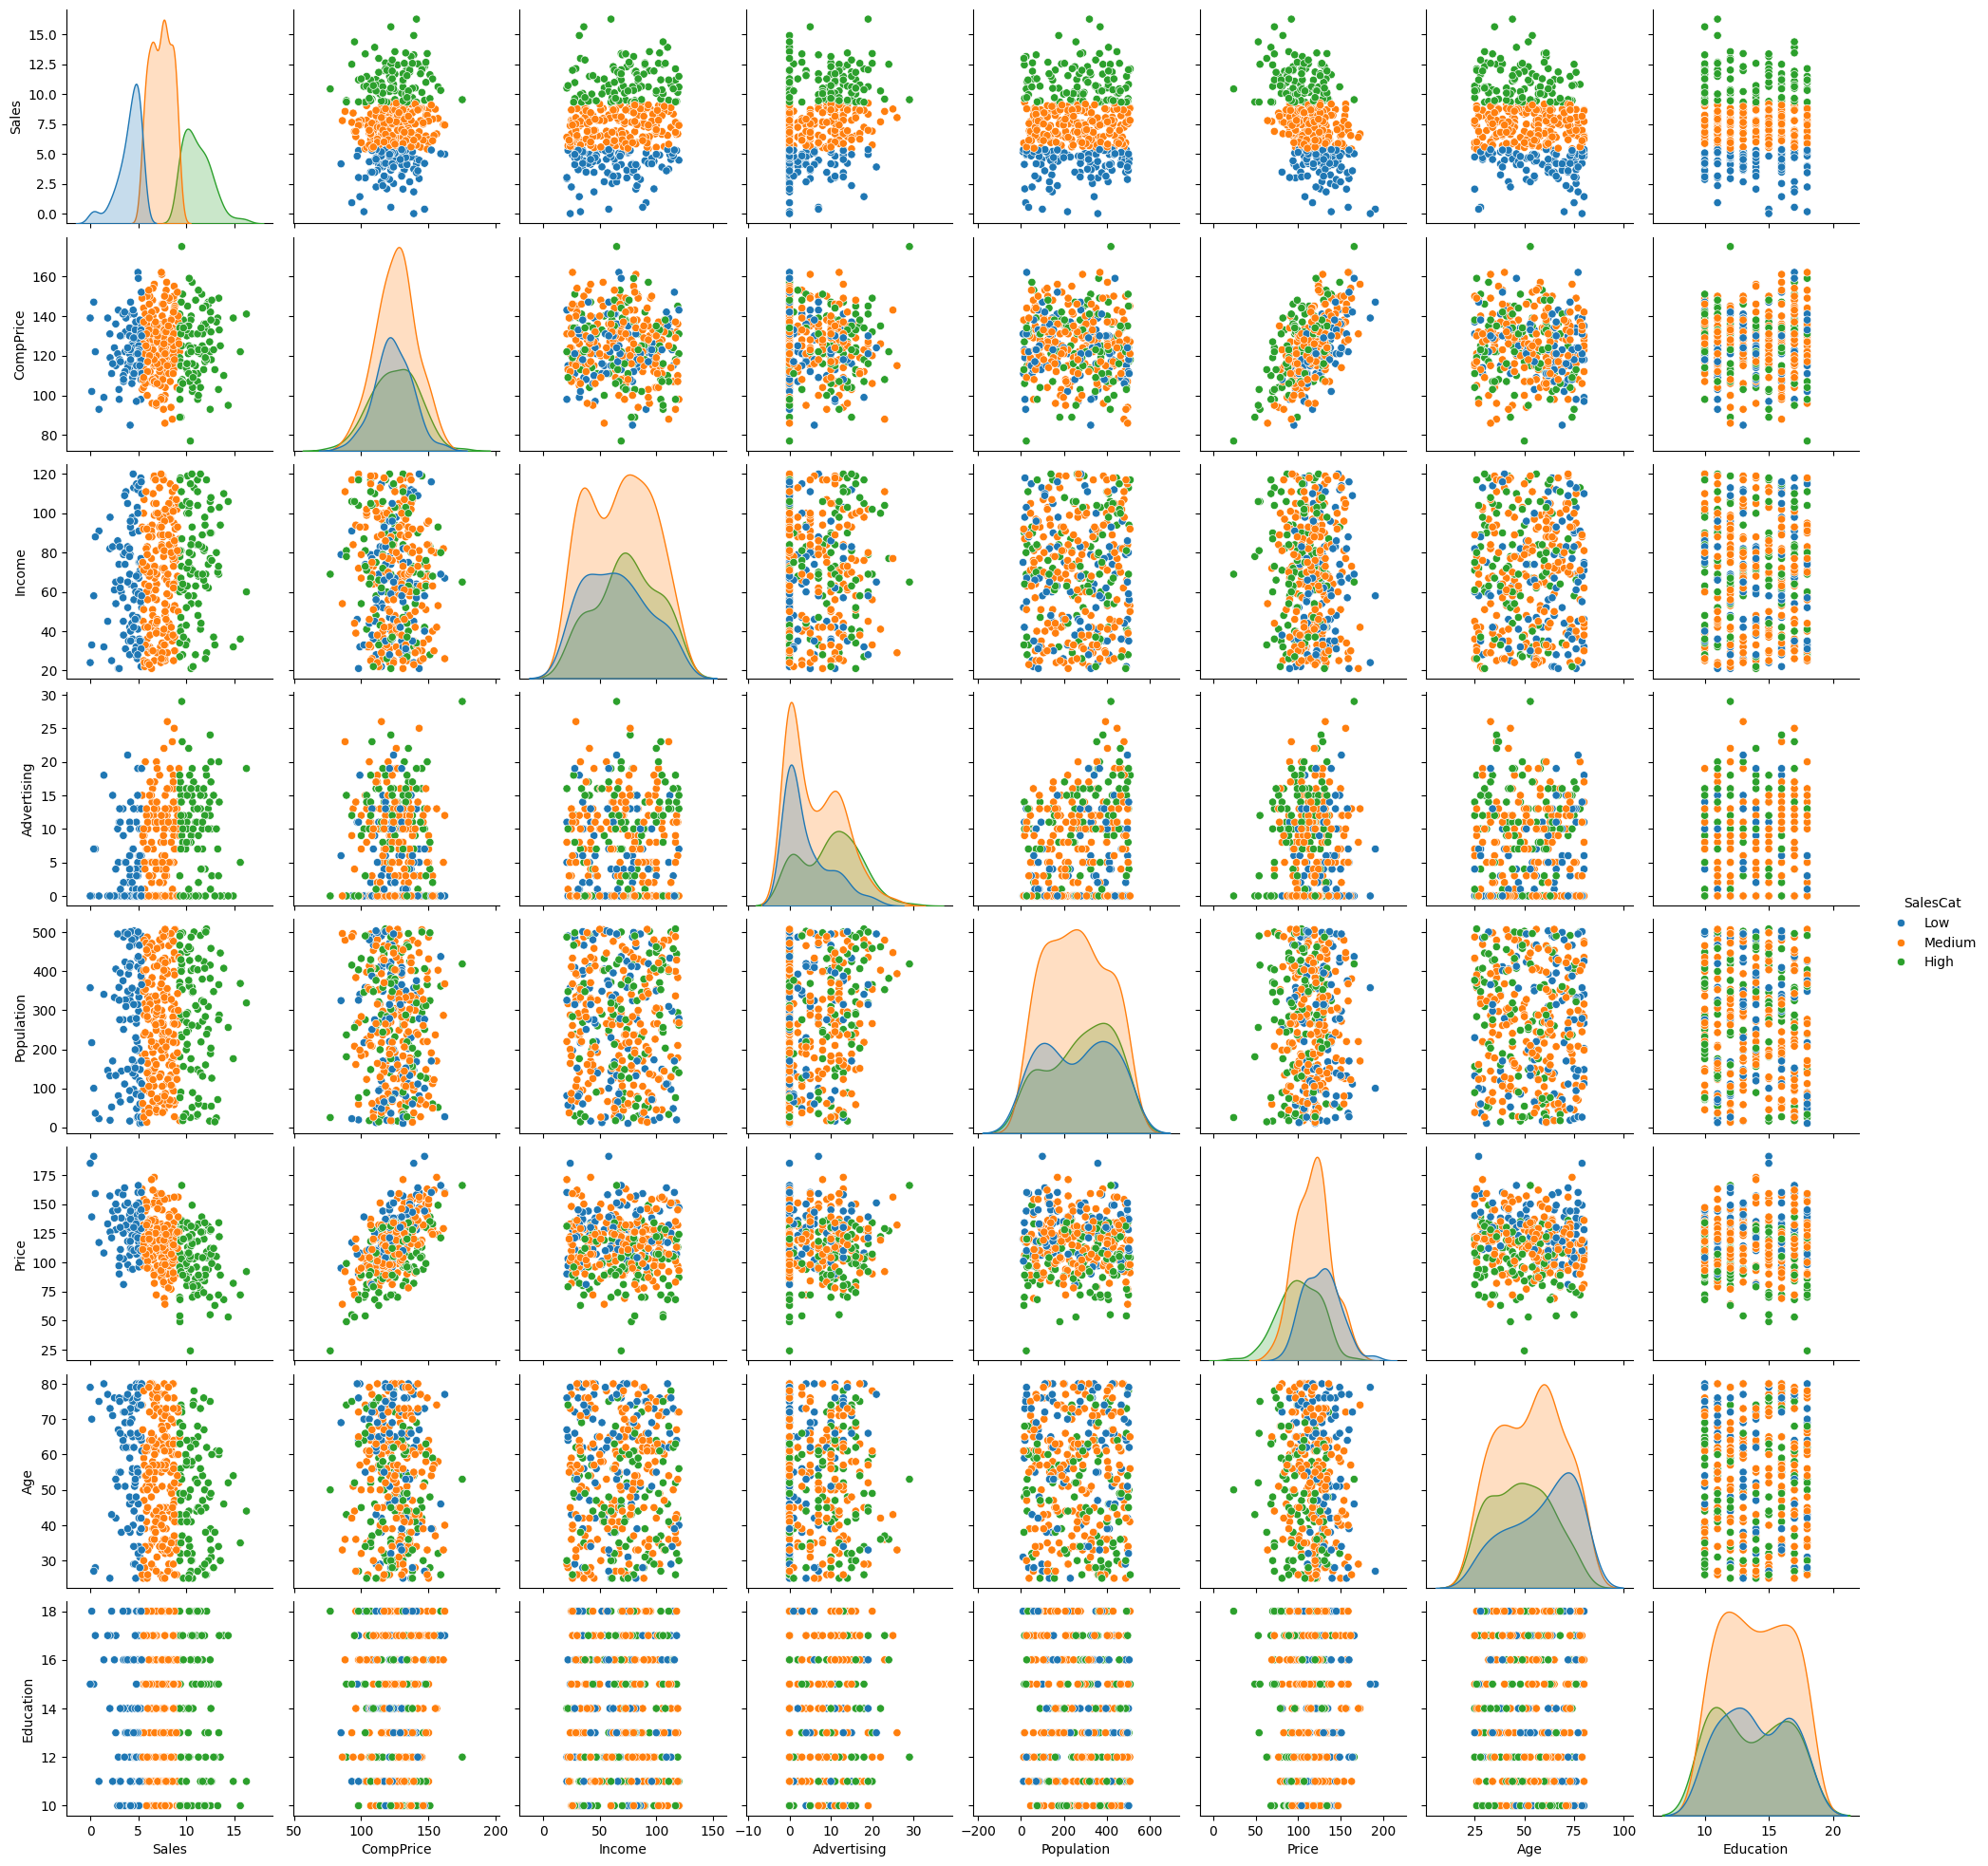

In [42]:
#pairplot
sns.pairplot(data=df1,hue='SalesCat')
plt.show()

# **Encoding**

In [43]:
#here 'ShelveLoc','Urban','US','SalesCat' are object base data ,so to perform ml we have to convert them in numeric
# One hot encoding and LabelEncoding

In [44]:
df_enc=pd.get_dummies(df1.iloc[:,:-1])

In [45]:
df_enc.head()

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   
2  10.06        113      35           10         269     80   59         12   
3   7.40        117     100            4         466     97   55         14   
4   4.15        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [47]:
df_salcat=pd.DataFrame({'SalesCat':le.fit_transform(df1['SalesCat'])})

In [48]:
df_salcat

SalesCat
0           0
1           0
2           0
3           2
4           1
..        ...
395         0
396         2
397         2
398         2
399         0

[400 rows x 1 columns]

In [49]:
df_final=pd.concat([df_enc,df_salcat],axis=1)
df_final

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0     9.50        138      73           11         276    120   42         17   
1    11.22        111      48           16         260     83   65         10   
2    10.06        113      35           10         269     80   59         12   
3     7.40        117     100            4         466     97   55         14   
4     4.15        141      64            3         340    128   38         13   
..     ...        ...     ...          ...         ...    ...  ...        ...   
395  12.57        138     108           17         203    128   33         14   
396   6.14        139      23            3          37    120   55         11   
397   7.41        162      26           12         368    159   40         18   
398   5.94        100      79            7         284     95   50         12   
399   9.71        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0                1               0                 0         0          1   
1                0               1                 0         0          1   
2                0               0                 1         0          1   
3                0               0                 1         0          1   
4                1               0                 0         0          1   
..             ...             ...               ...       ...        ...   
395              0               1                 0         0          1   
396              0               0                 1         1          0   
397              0               0                 1         0          1   
398              1               0                 0         0          1   
399              0               1                 0         0          1   

     US_No  US_Yes  SalesCat  
0        0       1         0  
1        0       1         0  
2        0       1         0  
3        0       1         2  
4        1       0         1  
..     ...     ...       ...  
395      0       1         0  
396      0       1         2  
397      0       1         2  
398      0       1         2  
399      0       1         0  

[400 rows x 16 columns]

In [50]:
#sales col is not need so drop
df_final.drop('Sales',axis=1,inplace=True)

In [51]:
#renaming salescat as sales
df_final.rename(columns={'SalesCat':'Sales'},inplace=True)

In [52]:
df_final

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0                1               0                 0         0          1   
1                0               1                 0         0          1   
2                0               0                 1         0          1   
3                0               0                 1         0          1   
4                1               0                 0         0          1   
..             ...             ...               ...       ...        ...   
395              0               1                 0         0          1   
396              0               0                 1         1          0   
397              0               0                 1         0          1   
398              1               0                 0         0          1   
399              0               1                 0         0          1   

     US_No  US_Yes  Sales  
0        0       1      0  
1        0       1      0  
2        0       1      0  
3        0       1      2  
4        1       0      1  
..     ...     ...    ...  
395      0       1      0  
396      0       1      2  
397      0       1      2  
398      0       1      2  
399      0       1      0  

[400 rows x 15 columns]

In [53]:
df_final['Sales'].value_counts()

2    198
0    102
1    100
Name: Sales, dtype: int64

In [54]:
(df1['SalesCat'].value_counts())/len(df1)*100

Medium    49.5
High      25.5
Low       25.0
Name: SalesCat, dtype: float64

# **PieChart**

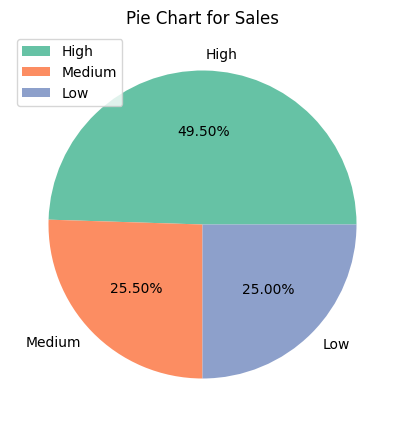

In [55]:
#pie chart
plt.figure(figsize=(5,5))
color=sns.color_palette('Set2')
plt.pie(df_final['Sales'].value_counts(),labels=df1['SalesCat'].unique(),autopct= '%.2f%%',colors=color)
plt.title('Pie Chart for Sales')
plt.legend()
plt.show()

# **Spliting into Training and Testing**

In [56]:
df_final.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  Sales  
0      0       1      0  
1      0       1      0  
2      0       1      0  
3      0       1      2  
4      1       0      1

In [57]:
#spliting into independent and dependent
x=df_final.iloc[:,:-1]   #independent feature
y=df_final['Sales']      #dependent feature

In [58]:
#finding important features

In [59]:
from sklearn.feature_selection import SelectKBest,chi2
from numpy import set_printoptions

In [60]:
test=SelectKBest(score_func=chi2,k=5)
fit=test.fit(x,y)

In [61]:
set_printoptions(precision=4)
print(fit.scores_)

[2.2536e+00 6.5145e+01 2.5177e+02 1.4111e+02 3.0088e+02 1.0658e+02
 6.8968e-01 4.8524e+01 6.6175e+01 8.6548e+00 1.6375e-01 6.8520e-02
 1.3109e+01 7.2151e+00]


In [62]:
#creating dataframe of important features
d={'feature':x.columns,'scores':fit.scores_}
score=pd.DataFrame(d)
score.sort_values('scores',ascending=False)

feature      scores
4              Price  300.881058
2        Advertising  251.767458
3         Population  141.113336
5                Age  106.577639
8     ShelveLoc_Good   66.174919
1             Income   65.145403
7      ShelveLoc_Bad   48.524460
12             US_No   13.109136
9   ShelveLoc_Medium    8.654770
13            US_Yes    7.215106
0          CompPrice    2.253637
6          Education    0.689685
10          Urban_No    0.163751
11         Urban_Yes    0.068520

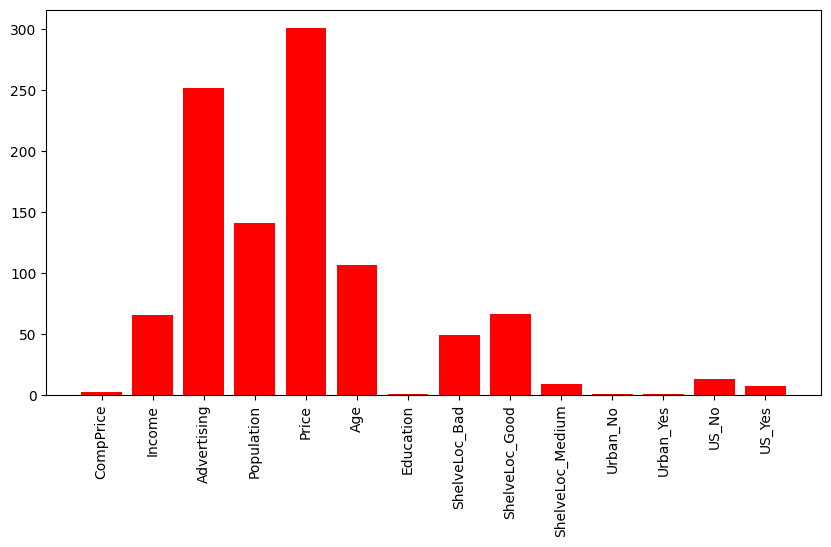

In [63]:
#barplot
plt.figure(figsize=(10,5))
plt.bar(score['feature'],score['scores'],color='red')
plt.xticks(rotation=90)
plt.show()

In [64]:
#model with important feature

In [65]:
model_final=df_final[['Price','Advertising','Population','Age','Income','ShelveLoc_Good','ShelveLoc_Bad','ShelveLoc_Medium','Sales']]
model_final

Price  Advertising  Population  Age  Income  ShelveLoc_Good  \
0      120           11         276   42      73               0   
1       83           16         260   65      48               1   
2       80           10         269   59      35               0   
3       97            4         466   55     100               0   
4      128            3         340   38      64               0   
..     ...          ...         ...  ...     ...             ...   
395    128           17         203   33     108               1   
396    120            3          37   55      23               0   
397    159           12         368   40      26               0   
398     95            7         284   50      79               0   
399    120            0          27   49      37               1   

     ShelveLoc_Bad  ShelveLoc_Medium  Sales  
0                1                 0      0  
1                0                 0      0  
2                0                 1      0  
3                0                 1      2  
4                1                 0      1  
..             ...               ...    ...  
395              0                 0      0  
396              0                 1      2  
397              0                 1      2  
398              1                 0      2  
399              0                 0      0  

[400 rows x 9 columns]

In [66]:
x=model_final.iloc[:,:-1]
y=model_final['Sales']

**train and test split**

In [67]:
#train,test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.28,random_state=42)

In [68]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(287, 8)
(287,)
(113, 8)
(113,)


In [69]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import classification_report

In [70]:
k=KFold(n_splits=10,random_state=42,shuffle=True)

# **RANDOM FOREST**

In [71]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,criterion='entropy',max_features=5,max_depth=5,random_state=40)

In [72]:
#for cross validation
result=cross_val_score(rf,x,y,cv=k)
result

array([0.575, 0.75 , 0.775, 0.7  , 0.7  , 0.65 , 0.575, 0.775, 0.55 ,
       0.75 ])

In [73]:
result.mean()

0.6799999999999999

In [74]:
#for train test split
rf.fit(xtrain,ytrain)
rf.predict(xtest)
print(classification_report(ytest,rf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70        29
           1       0.76      0.54      0.63        24
           2       0.70      0.83      0.76        60

    accuracy                           0.73       113
   macro avg       0.74      0.68      0.70       113
weighted avg       0.73      0.73      0.72       113



In [75]:
# accuracy is 0.73 i.e 73%

***Accuracy:73%***

# **BAGGING CLASSIFIER**

In [76]:
#bagging classifier model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=4)
model=BaggingClassifier(base_estimator=dt,n_estimators=100,random_state=42)

In [78]:
#cross validation
res1=cross_val_score(model,x,y,cv=k)
print(res1)
print(res1.mean())

[0.625 0.725 0.75  0.675 0.725 0.65  0.55  0.725 0.575 0.675]
0.6675000000000001


In [79]:
#train test split
model.fit(xtrain,ytrain)
model.predict(xtest)
print(classification_report(ytest,model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74        29
           1       0.79      0.46      0.58        24
           2       0.70      0.83      0.76        60

    accuracy                           0.73       113
   macro avg       0.75      0.67      0.69       113
weighted avg       0.73      0.73      0.72       113



In [80]:
# accuracy is 0.73 i.e 73%

***Accuracy : 73%***

# **ADABOOST**

In [81]:
#adaboost model
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=25,random_state=25)

In [82]:
#cross validation
res2=cross_val_score(ad,x,y,cv=k)
print(res2)
print(res2.mean())

[0.725 0.7   0.75  0.7   0.65  0.6   0.625 0.575 0.675 0.775]
0.6775


In [83]:
#train test split
ad.fit(xtrain,ytrain)
ad.predict(xtest)
print(classification_report(ytest,ad.predict(xtest)))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71        29
           1       0.67      0.58      0.62        24
           2       0.71      0.73      0.72        60

    accuracy                           0.70       113
   macro avg       0.69      0.68      0.69       113
weighted avg       0.70      0.70      0.70       113



In [84]:
# accuracy is 0.70 i.e 70%

***Accuracy : 70%***

# **Stacking**

In [85]:
#stacking model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [86]:
estimators=[]

In [87]:
v1=LogisticRegression(max_iter=300)
estimators.append(('lr',v1))

In [88]:
v2=DecisionTreeClassifier(criterion='gini',max_depth=4)
estimators.append(('dt',v2))

In [89]:
v3=SVC()
estimators.append(('sv',v3))

In [90]:
v4=RandomForestClassifier(criterion='entropy',n_estimators=300,max_depth=4,max_features=4)
estimators.append(('rf',v4))

In [91]:
estimators

[('lr', LogisticRegression(max_iter=300)),
 ('dt', DecisionTreeClassifier(max_depth=4)),
 ('sv', SVC()),
 ('rf',
  RandomForestClassifier(criterion='entropy', max_depth=4, max_features=4,
                         n_estimators=300))]

In [92]:
voting_estimators=VotingClassifier(estimators)
voting_estimators

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=300)),
                             ('dt', DecisionTreeClassifier(max_depth=4)),
                             ('sv', SVC()),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=4,
                                                     max_features=4,
                                                     n_estimators=300))])

In [93]:
#cross validation
res3=cross_val_score(voting_estimators,x,y,cv=10)
print(res3)
print(res3.mean())

[0.625 0.75  0.6   0.7   0.6   0.725 0.7   0.6   0.725 0.625]
0.6649999999999999


In [94]:
#train test split
voting_estimators.fit(xtrain,ytrain)
voting_estimators.predict(xtest)
print(classification_report(ytest,voting_estimators.predict(xtest)))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70        29
           1       0.75      0.50      0.60        24
           2       0.69      0.83      0.76        60

    accuracy                           0.72       113
   macro avg       0.73      0.66      0.69       113
weighted avg       0.72      0.72      0.71       113



In [95]:
#accuracy is 0.73 i.e 73%

***Accuracy : 73%***

# **XGBOOST**

In [96]:
#pip install xgboost

In [97]:
#xgboost model
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=90,max_depth=3)

In [98]:
#cross validation
res3=cross_val_score(xgb,x,y,cv=7)
print(res3)
print(res3.mean())

[0.5862 0.614  0.6316 0.614  0.7193 0.5789 0.5965]
0.6200846944948578


In [99]:
#train test split
xgb.fit(xtrain,ytrain)
xgb.predict(xtest)
print(classification_report(ytest,xgb.predict(xtest)))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        29
           1       0.67      0.50      0.57        24
           2       0.68      0.75      0.71        60

    accuracy                           0.68       113
   macro avg       0.68      0.65      0.66       113
weighted avg       0.68      0.68      0.68       113



In [100]:
#accuracy is 0.68 i.e 68%

***Accuracy : 68%***

# **LGBOOST**

In [101]:
#pip install lightgbm

In [102]:
#lgboost model
import lightgbm as lgb
lb=lgb.Dataset(xtrain,label=ytrain)

In [103]:
params = {}

params["learning_rate"] = 0.2
params["metric"]="binary_logloss"
params["min_data"]=40
params["max_depth"]=5

params

{'learning_rate': 0.2,
 'metric': 'binary_logloss',
 'min_data': 40,
 'max_depth': 5}

In [104]:
clf = lgb.train(params,lb,500)
ypred = clf.predict(xtest)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 301
[LightGBM] [Info] Number of data points in the train set: 287, number of used features: 8
[LightGBM] [Info] Start training from score 1.226481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

In [105]:
from sklearn.metrics import accuracy_score
ypred = [round(v) for v in ypred]
print(accuracy_score(ytest,ypred))

0.4247787610619469


In [106]:
# accuracy is 0.4247787610619469 i.e 42%

***Accuracy : 42%***

# **Tree plot for visualization**

In [107]:
fn=x.columns
cn=['high','low','medium']

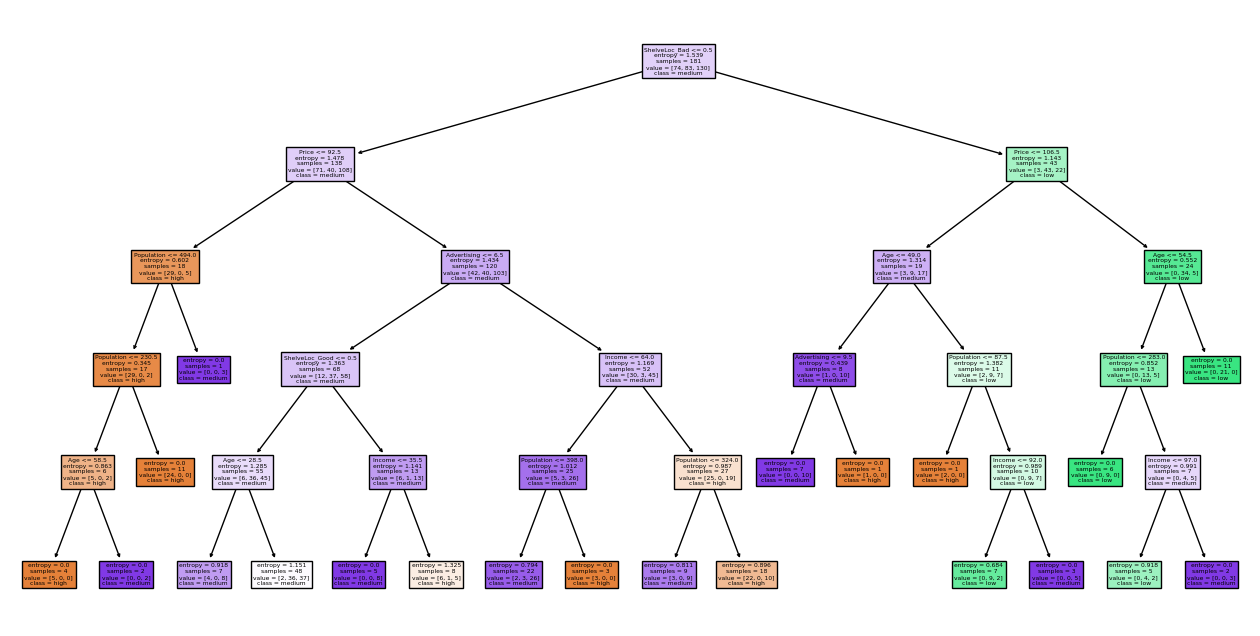

In [108]:
#tree plot
plt.figure(figsize=(16,8))
tree.plot_tree(rf.estimators_[40],feature_names=fn,class_names=cn,filled=True)
plt.show()

# **Conclusion**

In [109]:
# So by performing all different models the highest accuracy  is approximately 73%
# The Model with the highest accuracy is Random Forest Model,Bagging Model,Stacking Model i.e 73%

In [110]:
#####completed///////////

# **completed**